# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


726

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
temp=[]
cityList=[]
country=[]
lat=[]
lon=[]
cloudiness=[]
humidity=[]
date=[]
maxTemp=[]
wind=[]
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    # Build query URL and request your results in Celsius
    try:
        #print("===")
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        print(f"Retrieving records for | {city}")
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        if weather_json["cod"] != "404":
            cityList.append(city)
            temp.append(weather_json['main']['temp'])
            country.append(weather_json['sys']['country'])
            lat.append(weather_json['coord']['lat'])
            lon.append(weather_json['coord']['lon'])
            cloudiness.append(weather_json['clouds']['all'])
            wind.append(weather_json['wind']['speed'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            maxTemp.append(weather_json['main']['temp_max'])
    except :
        print(f"city({city}) not found!! skipping")
        pass
print("--------------------------------")
print("Data Retrieval Complete ")
print("--------------------------------")

Beginning Data Retrieval
---------------------------
Retrieving records | bolshaya rechka
Retrieving records | illoqqortoormiut
Retrieving records | dingle
Retrieving records | esperance
Retrieving records | bilma
Retrieving records | evensk
Retrieving records | bandarbeyla
Retrieving records | punta arenas
Retrieving records | butaritari
Retrieving records | chokurdakh
Retrieving records | tarudant
Retrieving records | puerto ayora
Retrieving records | geraldton
Retrieving records | hobart
Retrieving records | kaitangata
Retrieving records | cidreira
Retrieving records | lagoa
Retrieving records | kavieng
Retrieving records | kyra
Retrieving records | rikitea
Retrieving records | avera
Retrieving records | ushuaia
Retrieving records | kapaa
Retrieving records | one hundred mile house
Retrieving records | saint anthony
Retrieving records | taolanaro
Retrieving records | belushya guba
Retrieving records | peleduy
Retrieving records | saint george
Retrieving records | am timan
Retrieving

Retrieving records | northam
Retrieving records | west bay
Retrieving records | tiznit
Retrieving records | bambous virieux
Retrieving records | pangnirtung
Retrieving records | zabrani
Retrieving records | kallaste
Retrieving records | general roca
Retrieving records | kavaratti
Retrieving records | marsa matruh
Retrieving records | wanning
Retrieving records | fuling
Retrieving records | sao raimundo nonato
Retrieving records | rio branco
Retrieving records | maceio
Retrieving records | palabuhanratu
Retrieving records | grindavik
Retrieving records | puerto montt
Retrieving records | albury
Retrieving records | devonport
Retrieving records | longyearbyen
Retrieving records | pascagoula
Retrieving records | gambela
Retrieving records | aksarka
Retrieving records | okhotsk
Retrieving records | shingu
Retrieving records | tasiilaq
Retrieving records | isangel
Retrieving records | samarai
Retrieving records | attawapiskat
Retrieving records | husavik
Retrieving records | a
Retrieving re

Retrieving records | broken hill
Retrieving records | olginskaya
Retrieving records | gansing
Retrieving records | burlington
Retrieving records | saint-denis
Retrieving records | thohoyandou
Retrieving records | takoradi
Retrieving records | inuvik
Retrieving records | nantucket
Retrieving records | uniao
Retrieving records | mwanza
Retrieving records | miyako
Retrieving records | modasa
Retrieving records | simpang
Retrieving records | naenwa
Retrieving records | jizan
Retrieving records | nakamura
Retrieving records | ahipara
Retrieving records | phan thiet
Retrieving records | amparafaravola
Retrieving records | ternate
Retrieving records | klyuchi
Retrieving records | bud
Retrieving records | beaverlodge
Retrieving records | sambava
Retrieving records | dubbo
Retrieving records | general artigas
Retrieving records | caconda
Retrieving records | thinadhoo
Retrieving records | meulaboh
Retrieving records | archidona
Retrieving records | kabo
Retrieving records | kununurra
Retrieving

In [20]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cityList,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Temp": temp,
    "Lat":lat,
    "Lon":lon,
    "Max Temp":maxTemp,
    "Wind Speed":wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lon,Max Temp,Wind Speed
0,bolshaya rechka,0,RU,1562051817,35,86.00,51.95,104.74,86.00,15.66
1,dingle,100,PH,1562051818,72,84.85,11.00,122.67,84.85,7.92
2,esperance,90,AU,1562051818,55,60.80,-33.86,121.89,60.80,9.17
3,bilma,40,NE,1562051819,23,88.09,18.69,12.92,88.09,17.20
4,evensk,97,RU,1562051819,85,52.27,61.92,159.24,52.27,9.42


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
WeatherDataCSV=weather_data.to_csv(r'/Users/nithavijaysudh/Projects/WeatherAPI/Resources/weatherData.csv',index=False,header=True)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

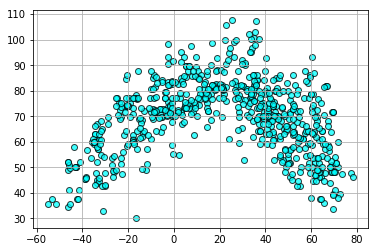

In [17]:
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Max Temp'].max()
yMin=weather_data['Max Temp'].min()
x=weather_data['Lat']
y=weather_data['Max Temp']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='cyan', marker="o",label=None, edgecolors="black", alpha=0.75)


#### Latitude vs. Humidity Plot

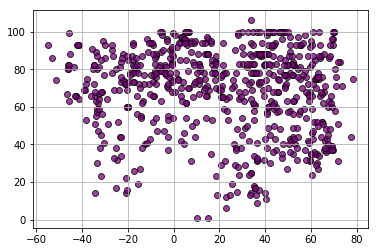

In [21]:
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Humidity'].max()
yMin=weather_data['Humidity'].min()
x=weather_data['Lat']
y=weather_data['Humidity']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='purple', marker="o",label=None, edgecolors="black", alpha=0.75)


#### Latitude vs. Cloudiness Plot

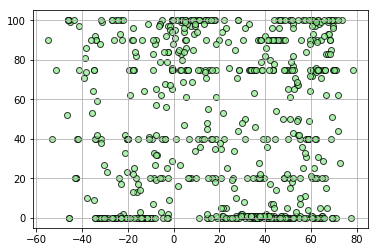

In [25]:
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Cloudiness'].max()
yMin=weather_data['Cloudiness'].min()
x=weather_data['Lat']
y=weather_data['Cloudiness']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='lightgreen', marker="o",label=None, edgecolors="black", alpha=0.75)


#### Latitude vs. Wind Speed Plot

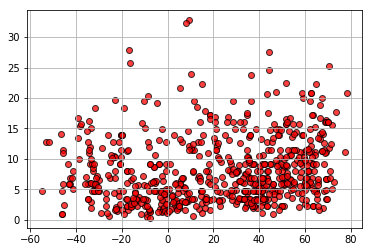

In [26]:
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Wind Speed'].max()
yMin=weather_data['Wind Speed'].min()
x=weather_data['Lat']
y=weather_data['Wind Speed']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='red', marker="o",label=None, edgecolors="black", alpha=0.75)
